# Analysis of user collection

In this notebook, the retrieved results of the user collection is analyzed.

In [1]:
import glob
import time
import sys
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
fp_figs = Path("figs")

## User collection files

In [3]:
data_files = glob.glob("methods/*/results/*.csv")

data_files

['methods\\github_search\\results\\ids_search_repos.csv',
 'methods\\github_search\\results\\ids_search_users.csv',
 'methods\\github_search\\results\\ids_topic_repos.csv',
 'methods\\papers_with_code\\results\\ids_paperswithcode.csv',
 'methods\\profile_pages\\results\\employees_github_usernames.csv',
 'methods\\pure\\results\\ids_pure_users.csv']

## Dataset
The data contains the source where the GitHub user id is found, the GitHub user id and university id if it is available.

In [4]:
df_github_names_long = pd.concat(
    [ pd.read_csv(fp) for fp in data_files], 
    axis=0, 
    keys=data_files, 
    names=["source", "row"]
).reset_index("source").reset_index(drop=True)
df_github_names_long

,source,service,user_id
0,methods\github_search\results\ids_search_repos...,github.com,jonasmoons
1,methods\github_search\results\ids_search_repos...,github.com,UtrechtUniversity
2,methods\github_search\results\ids_search_repos...,github.com,gglucass
3,methods\github_search\results\ids_search_repos...,github.com,MarcelRobeer
4,methods\github_search\results\ids_search_repos...,github.com,ekatrukha
...,...,...,...
645,methods\pure\results\ids_pure_users.csv,github.com,keesmulder
646,methods\pure\results\ids_pure_users.csv,github.com,RianneSchouten
647,methods\pure\results\ids_pure_users.csv,github.com,ydluo
648,methods\pure\results\ids_pure_users.csv,github.com,marnixnaber


### Retrieval count

The following results shows how many times user indentifiers are found with each retrieval method. This can be an indicator the findability of users. 

In [5]:
df_name_method_crosstab = pd.crosstab(
    df_github_names_long["user_id"],
    df_github_names_long["source"]
)
df_name_method_crosstab

source,methods\github_search\results\ids_search_repos.csv,methods\github_search\results\ids_search_users.csv,methods\github_search\results\ids_topic_repos.csv,methods\papers_with_code\results\ids_paperswithcode.csv,methods\profile_pages\results\employees_github_usernames.csv,methods\pure\results\ids_pure_users.csv
user_id,,,,,,
19giorgosts,0,1,0,0,0,0
4009509,0,1,0,0,0,0
73616e646572,0,0,0,0,1,0
AI4Finance-Foundation,0,0,0,1,0,0
AI4Finance-LLC,0,0,0,2,0,0
...,...,...,...,...,...,...
yoepvanloenen,1,0,0,0,0,0
ystouthart,1,0,1,0,0,0
yuntaoj,0,1,0,0,0,0


The following example shows the findability of the ASReview project (project at Utrecht University).

In [6]:
df_name_method_crosstab.loc['asreview']

source
methods\github_search\results\ids_search_repos.csv              0
methods\github_search\results\ids_search_users.csv              0
methods\github_search\results\ids_topic_repos.csv               7
methods\papers_with_code\results\ids_paperswithcode.csv         0
methods\profile_pages\results\employees_github_usernames.csv    4
methods\pure\results\ids_pure_users.csv                         0
Name: asreview, dtype: int64

In [7]:
df_name_findability = (df_name_method_crosstab > 0).astype(int).sum(axis=1).sort_values(ascending=False)
df_name_findability

user_id
kevin4998            3
J535D165             3
UU-Hydro             3
ekatrukha            3
UtrechtUniversity    3
                    ..
ivasconcelosUU       1
j00st                1
jacobmpaul           1
jangerrith           1
19giorgosts          1
Length: 495, dtype: int64

In [8]:
df_method_findability = (df_name_method_crosstab > 0).astype(int).sum(axis=0).sort_values(ascending=False)
df_method_findability

source
methods\github_search\results\ids_search_users.csv              263
methods\github_search\results\ids_search_repos.csv              179
methods\profile_pages\results\employees_github_usernames.csv     64
methods\github_search\results\ids_topic_repos.csv                17
methods\pure\results\ids_pure_users.csv                          11
methods\papers_with_code\results\ids_paperswithcode.csv          10
dtype: int64

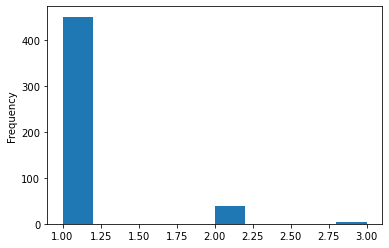

In [9]:
df_name_findability.plot.hist()
plt.savefig(Path(fp_figs, 'user_collection_user_findability.png'))

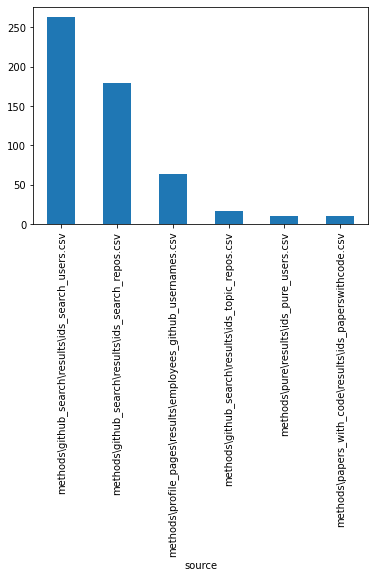

In [10]:
df_method_findability.plot.bar()
plt.savefig(Path(fp_figs, 'user_collection_method_findability.png'))

In [11]:
df_annotated_users = pd.read_excel(Path("results", "users_enriched_updated_2021-11-20.xlsx"))
df_annotated_users[["user_id", "is_student", "is_employee", "is_currently_employed", "is_research_group", "final_decision"]]

,user_id,is_student,is_employee,is_currently_employed,is_research_group,final_decision
0,19910101bacon,False,NaN,NaN,NaN,0
1,19giorgosts,False,1.0,1.0,0.0,1
2,4009509,True,0.0,0.0,0.0,0
3,73616e646572,False,1.0,1.0,0.0,1
4,a-quei,False,0.0,0.0,0.0,1
...,...,...,...,...,...,...
485,ystouthart,False,0.0,0.0,0.0,0
486,yuntaoj,False,0.0,0.0,0.0,1
487,zievathustra,False,1.0,1.0,0.0,1
488,zupami,False,0.0,0.0,0.0,0


In [12]:
df_annotated_users_included = df_annotated_users[df_annotated_users["final_decision"] == 1]

<AxesSubplot:>

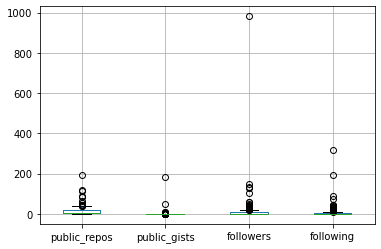

In [13]:
df_annotated_users_included.boxplot(column=['public_repos','public_gists', 'followers', 'following'])


,user_id,source,id,node_id,avatar_url,gravatar_id,url,html_url,followers_url,following_url,...,following,created_at,updated_at,is_student,is_employee,is_currently_employed,is_research_group,final_decision,note,new_entry
68,brentp,ids_search_users.csv,1739.0,MDQ6VXNlcjE3Mzk=,https://avatars.githubusercontent.com/u/1739?v=4,NaN,https://api.github.com/users/brentp,https://github.com/brentp,https://api.github.com/users/brentp/followers,https://api.github.com/users/brentp/following{...,...,193.0,2008-02-29T17:07:25Z,2021-11-03T08:21:37Z,False,1.0,1.0,0.0,1,UMC,False
449,uil-ots-labs,ids_search_repos.csv,8588005.0,MDEyOk9yZ2FuaXphdGlvbjg1ODgwMDU=,https://avatars.githubusercontent.com/u/858800...,NaN,https://api.github.com/users/UiL-OTS-labs,https://github.com/UiL-OTS-labs,https://api.github.com/users/UiL-OTS-labs/foll...,https://api.github.com/users/UiL-OTS-labs/foll...,...,0.0,2014-08-29T07:08:10Z,2021-03-06T17:35:34Z,False,0.0,0.0,1.0,1,0,False
89,clariah,employees_github_usernames.csv,15210767.0,MDEyOk9yZ2FuaXphdGlvbjE1MjEwNzY3,https://avatars.githubusercontent.com/u/152107...,NaN,https://api.github.com/users/CLARIAH,https://github.com/CLARIAH,https://api.github.com/users/CLARIAH/followers,https://api.github.com/users/CLARIAH/following...,...,0.0,2015-10-20T09:15:30Z,2021-02-10T09:39:18Z,False,0.0,0.0,1.0,1,0,False
453,utrechtuniversity,ids_search_repos.csv,11516575.0,MDEyOk9yZ2FuaXphdGlvbjExNTE2NTc1,https://avatars.githubusercontent.com/u/115165...,NaN,https://api.github.com/users/UtrechtUniversity,https://github.com/UtrechtUniversity,https://api.github.com/users/UtrechtUniversity...,https://api.github.com/users/UtrechtUniversity...,...,0.0,2015-03-17T07:42:21Z,2021-10-27T10:42:45Z,False,0.0,0.0,1.0,1,0,False
87,cjvanlissa,employees_github_usernames.csv,11941251.0,MDQ6VXNlcjExOTQxMjUx,https://avatars.githubusercontent.com/u/119412...,NaN,https://api.github.com/users/cjvanlissa,https://github.com/cjvanlissa,https://api.github.com/users/cjvanlissa/followers,https://api.github.com/users/cjvanlissa/follow...,...,2.0,2015-04-14T10:17:43Z,2021-10-26T14:36:31Z,False,1.0,1.0,0.0,1,0,False
457,uudigitalhumanitieslab,ids_search_users.csv,7656260.0,MDEyOk9yZ2FuaXphdGlvbjc2NTYyNjA=,https://avatars.githubusercontent.com/u/765626...,NaN,https://api.github.com/users/UUDigitalHumaniti...,https://github.com/UUDigitalHumanitieslab,https://api.github.com/users/UUDigitalHumaniti...,https://api.github.com/users/UUDigitalHumaniti...,...,0.0,2014-05-21T09:40:56Z,2021-11-05T14:43:22Z,False,0.0,0.0,1.0,1,0,False
462,vankesteren,employees_github_usernames.csv,11596858.0,MDQ6VXNlcjExNTk2ODU4,https://avatars.githubusercontent.com/u/115968...,NaN,https://api.github.com/users/vankesteren,https://github.com/vankesteren,https://api.github.com/users/vankesteren/follo...,https://api.github.com/users/vankesteren/follo...,...,46.0,2015-03-22T11:46:17Z,2021-11-18T09:49:33Z,False,1.0,1.0,0.0,1,NaN,True
319,mycrofd,ids_search_users.csv,7660380.0,MDQ6VXNlcjc2NjAzODA=,https://avatars.githubusercontent.com/u/766038...,NaN,https://api.github.com/users/MycrofD,https://github.com/MycrofD,https://api.github.com/users/MycrofD/followers,https://api.github.com/users/MycrofD/following...,...,24.0,2014-05-21T17:35:26Z,2021-11-19T05:47:00Z,False,0.0,0.0,0.0,1,0,False
204,j535d165,ids_search_repos.csv,12981139.0,MDQ6VXNlcjEyOTgxMTM5,https://avatars.githubusercontent.com/u/129811...,NaN,https://api.github.com/users/J535D165,https://github.com/J535D165,https://api.github.com/users/J535D165/followers,https://api.github.com/users/J535D165/followin...,...,91.0,2015-06-20T19:05:01Z,2021-11-19T16:08:27Z,False,1.0,1.0,0.0,1,0,False
421,stan-dev,employees_github_usernames.csv,3374820.0,MDEyOk9yZ2FuaXphdGlvbjMzNzQ4MjA=,https://avatars.githubusercontent.com/u/337482...,NaN,https://api.github.com/users/stan-dev,https://github.com/stan-dev,https://api.github.com/users/stan-dev/followers,https://api.github.com/users/stan-dev/followin...,...,0.0,2013-01-24T22:56:10Z,2021-03-04T17:35:52Z,False,1.

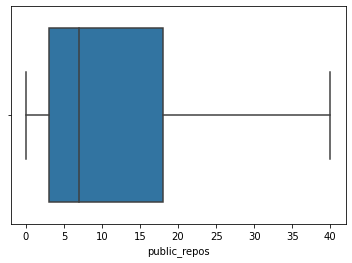

In [14]:
sns.boxplot(x=df_annotated_users_included['public_repos'], showfliers = False)
df_annotated_users_included.sort_values('public_repos', ascending=False).head(10)

,user_id,source,id,node_id,avatar_url,gravatar_id,url,html_url,followers_url,following_url,...,following,created_at,updated_at,is_student,is_employee,is_currently_employed,is_research_group,final_decision,note,new_entry
68,brentp,ids_search_users.csv,1739.0,MDQ6VXNlcjE3Mzk=,https://avatars.githubusercontent.com/u/1739?v=4,NaN,https://api.github.com/users/brentp,https://github.com/brentp,https://api.github.com/users/brentp/followers,https://api.github.com/users/brentp/following{...,...,193.0,2008-02-29T17:07:25Z,2021-11-03T08:21:37Z,False,1.0,1.0,0.0,1,UMC,False
462,vankesteren,employees_github_usernames.csv,11596858.0,MDQ6VXNlcjExNTk2ODU4,https://avatars.githubusercontent.com/u/115968...,NaN,https://api.github.com/users/vankesteren,https://github.com/vankesteren,https://api.github.com/users/vankesteren/follo...,https://api.github.com/users/vankesteren/follo...,...,46.0,2015-03-22T11:46:17Z,2021-11-18T09:49:33Z,False,1.0,1.0,0.0,1,NaN,True
129,ekatrukha,ids_search_repos.csv,779131.0,MDQ6VXNlcjc3OTEzMQ==,https://avatars.githubusercontent.com/u/779131...,NaN,https://api.github.com/users/ekatrukha,https://github.com/ekatrukha,https://api.github.com/users/ekatrukha/followers,https://api.github.com/users/ekatrukha/followi...,...,13.0,2011-05-10T13:21:22Z,2021-11-05T14:27:03Z,False,0.0,0.0,0.0,1,0,False
105,daob,ids_search_users.csv,65516.0,MDQ6VXNlcjY1NTE2,https://avatars.githubusercontent.com/u/65516?v=4,NaN,https://api.github.com/users/daob,https://github.com/daob,https://api.github.com/users/daob/followers,https://api.github.com/users/daob/following{/o...,...,8.0,2009-03-21T12:02:25Z,2021-09-03T13:09:08Z,False,1.0,1.0,0.0,1,0,False
204,j535d165,ids_search_repos.csv,12981139.0,MDQ6VXNlcjEyOTgxMTM5,https://avatars.githubusercontent.com/u/129811...,NaN,https://api.github.com/users/J535D165,https://github.com/J535D165,https://api.github.com/users/J535D165/followers,https://api.github.com/users/J535D165/followin...,...,91.0,2015-06-20T19:05:01Z,2021-11-19T16:08:27Z,False,1.0,1.0,0.0,1,0,False
336,norm2782,ids_search_repos.csv,19933.0,MDQ6VXNlcjE5OTMz,https://avatars.githubusercontent.com/u/19933?v=4,NaN,https://api.github.com/users/norm2782,https://github.com/norm2782,https://api.github.com/users/norm2782/followers,https://api.github.com/users/norm2782/followin...,...,18.0,2008-08-07T19:23:01Z,2021-06-28T01:20:06Z,False,1.0,0.0,0.0,1,former employee,False
378,richardbartels,ids_search_users.csv,8066915.0,MDQ6VXNlcjgwNjY5MTU=,https://avatars.githubusercontent.com/u/806691...,NaN,https://api.github.com/users/richardbartels,https://github.com/richardbartels,https://api.github.com/users/richardbartels/fo...,https://api.github.com/users/richardbartels/fo...,...,0.0,2014-07-04T09:44:48Z,2021-11-05T08:25:31Z,False,1.0,1.0,0.0,1,NaN,True
209,japhir,ids_search_repos.csv,10659193.0,MDQ6VXNlcjEwNjU5MTkz,https://avatars.githubusercontent.com/u/106591...,NaN,https://api.github.com/users/japhir,https://github.com/japhir,https://api.github.com/users/japhir/followers,https://api.github.com/users/japhir/following{...,...,34.0,2015-01-22T19:38:33Z,2021-11-11T15:41:05Z,False,1.0,1.0,0.0,1,0,False
476,wouter-swierstra,ids_search_repos.csv,1588245.0,MDQ6VXNlcjE1ODgyNDU=,https://avatars.githubusercontent.com/u/158824...,NaN,https://api.github.com/users/wouter-swierstra,https://github.com/wouter-swierstra,https://api.github.com/users/wouter-swierstra/...,https://api.github.com/users/wouter-swierstra/...,...,3.0,2012-03-29T19:25:32Z,2021-10-22T14:30:05Z,False,1.0,1.0,0.0,1,0,False
271,leonardovida,ids_search_repos.csv,2588282.0,MDQ6VXNlcjI1ODgyODI=,https://avatars.githubusercontent.com/u/258828...,NaN,https://api.github.com/users/leonardovida,https://github.com/leonardovida,https://api.github.com/users/leonardovida/foll...,https://api.github.com/users/leonardovida/foll...,...,39.0,2012-10-18T10:09:34Z,2021-11-08T15:36:48Z,False,1.0,1.0,0.0,1,0,False


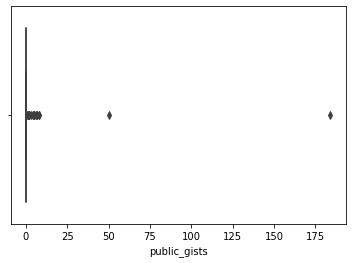

In [15]:
sns.boxplot(x=df_annotated_users_included['public_gists'])
df_annotated_users_included.sort_values('public_gists', ascending=False).head(10)

,user_id,source,id,node_id,avatar_url,gravatar_id,url,html_url,followers_url,following_url,...,following,created_at,updated_at,is_student,is_employee,is_currently_employed,is_research_group,final_decision,note,new_entry
68,brentp,ids_search_users.csv,1739.0,MDQ6VXNlcjE3Mzk=,https://avatars.githubusercontent.com/u/1739?v=4,NaN,https://api.github.com/users/brentp,https://github.com/brentp,https://api.github.com/users/brentp/followers,https://api.github.com/users/brentp/following{...,...,193.0,2008-02-29T17:07:25Z,2021-11-03T08:21:37Z,False,1.0,1.0,0.0,1,UMC,False
204,j535d165,ids_search_repos.csv,12981139.0,MDQ6VXNlcjEyOTgxMTM5,https://avatars.githubusercontent.com/u/129811...,NaN,https://api.github.com/users/J535D165,https://github.com/J535D165,https://api.github.com/users/J535D165/followers,https://api.github.com/users/J535D165/followin...,...,91.0,2015-06-20T19:05:01Z,2021-11-19T16:08:27Z,False,1.0,1.0,0.0,1,0,False
424,stefvanbuuren,ids_pure_users.csv,3919919.0,MDQ6VXNlcjM5MTk5MTk=,https://avatars.githubusercontent.com/u/391991...,NaN,https://api.github.com/users/stefvanbuuren,https://github.com/stefvanbuuren,https://api.github.com/users/stefvanbuuren/fol...,https://api.github.com/users/stefvanbuuren/fol...,...,8.0,2013-03-20T11:22:40Z,2021-11-14T20:08:36Z,False,1.0,1.0,0.0,1,0,False
213,jbikker,ids_search_users.csv,22001552.0,MDQ6VXNlcjIyMDAxNTUy,https://avatars.githubusercontent.com/u/220015...,NaN,https://api.github.com/users/jbikker,https://github.com/jbikker,https://api.github.com/users/jbikker/followers,https://api.github.com/users/jbikker/following...,...,1.0,2016-09-05T09:06:13Z,2021-11-11T11:50:20Z,False,0.0,0.0,0.0,1,0,False
476,wouter-swierstra,ids_search_repos.csv,1588245.0,MDQ6VXNlcjE1ODgyNDU=,https://avatars.githubusercontent.com/u/158824...,NaN,https://api.github.com/users/wouter-swierstra,https://github.com/wouter-swierstra,https://api.github.com/users/wouter-swierstra/...,https://api.github.com/users/wouter-swierstra/...,...,3.0,2012-03-29T19:25:32Z,2021-10-22T14:30:05Z,False,1.0,1.0,0.0,1,0,False
462,vankesteren,employees_github_usernames.csv,11596858.0,MDQ6VXNlcjExNTk2ODU4,https://avatars.githubusercontent.com/u/115968...,NaN,https://api.github.com/users/vankesteren,https://github.com/vankesteren,https://api.github.com/users/vankesteren/follo...,https://api.github.com/users/vankesteren/follo...,...,46.0,2015-03-22T11:46:17Z,2021-11-18T09:49:33Z,False,1.0,1.0,0.0,1,NaN,True
336,norm2782,ids_search_repos.csv,19933.0,MDQ6VXNlcjE5OTMz,https://avatars.githubusercontent.com/u/19933?v=4,NaN,https://api.github.com/users/norm2782,https://github.com/norm2782,https://api.github.com/users/norm2782/followers,https://api.github.com/users/norm2782/followin...,...,18.0,2008-08-07T19:23:01Z,2021-06-28T01:20:06Z,False,1.0,0.0,0.0,1,former employee,False
87,cjvanlissa,employees_github_usernames.csv,11941251.0,MDQ6VXNlcjExOTQxMjUx,https://avatars.githubusercontent.com/u/119412...,NaN,https://api.github.com/users/cjvanlissa,https://github.com/cjvanlissa,https://api.github.com/users/cjvanlissa/followers,https://api.github.com/users/cjvanlissa/follow...,...,2.0,2015-04-14T10:17:43Z,2021-10-26T14:36:31Z,False,1.0,1.0,0.0,1,0,False
14,alexandrosstergiou,employees_github_usernames.csv,25504317.0,MDQ6VXNlcjI1NTA0MzE3,https://avatars.githubusercontent.com/u/255043...,NaN,https://api.github.com/users/alexandrosstergiou,https://github.com/alexandrosstergiou,https://api.github.com/users/alexandrosstergio...,https://api.github.com/users/alexandrosstergio...,...,7.0,2017-02-02T11:23:32Z,2021-11-05T13:23:18Z,False,1.0,1.0,0.0,1,0,False
161,gerkovink,employees_github_usernames.csv,6791208.0,MDQ6VXNlcjY3OTEyMDg=,https://avatars.githubusercontent.com/u/679120...,NaN,https://api.github.com/users/gerkovink,https://github.com/gerkovink,https://api.github.com/users/gerkovink/followers,https://api.github.com/users/gerkovink/followi...,...,5.0,2014-02-26T07:52:19Z,2021-10-25T09:01:05Z,False,1.0,1.0,0.0,1,0,False


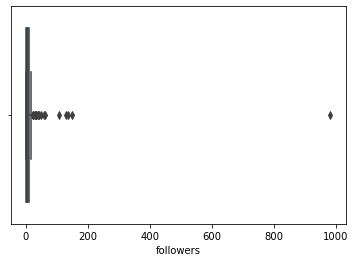

In [16]:
sns.boxplot(x=df_annotated_users_included['followers'])
df_annotated_users_included.sort_values('followers', ascending=False).head(10)

,user_id,source,id,node_id,avatar_url,gravatar_id,url,html_url,followers_url,following_url,...,following,created_at,updated_at,is_student,is_employee,is_currently_employed,is_research_group,final_decision,note,new_entry
66,bozso,employees_github_usernames.csv,15000107.0,MDQ6VXNlcjE1MDAwMTA3,https://avatars.githubusercontent.com/u/150001...,NaN,https://api.github.com/users/bozso,https://github.com/bozso,https://api.github.com/users/bozso/followers,https://api.github.com/users/bozso/following{/...,...,318.0,2015-10-06T16:11:21Z,2021-08-19T23:18:31Z,False,0.0,0.0,0.0,1,0,False
68,brentp,ids_search_users.csv,1739.0,MDQ6VXNlcjE3Mzk=,https://avatars.githubusercontent.com/u/1739?v=4,NaN,https://api.github.com/users/brentp,https://github.com/brentp,https://api.github.com/users/brentp/followers,https://api.github.com/users/brentp/following{...,...,193.0,2008-02-29T17:07:25Z,2021-11-03T08:21:37Z,False,1.0,1.0,0.0,1,UMC,False
204,j535d165,ids_search_repos.csv,12981139.0,MDQ6VXNlcjEyOTgxMTM5,https://avatars.githubusercontent.com/u/129811...,NaN,https://api.github.com/users/J535D165,https://github.com/J535D165,https://api.github.com/users/J535D165/followers,https://api.github.com/users/J535D165/followin...,...,91.0,2015-06-20T19:05:01Z,2021-11-19T16:08:27Z,False,1.0,1.0,0.0,1,0,False
69,bricker0,employees_github_usernames.csv,1919662.0,MDQ6VXNlcjE5MTk2NjI=,https://avatars.githubusercontent.com/u/191966...,NaN,https://api.github.com/users/bricker0,https://github.com/bricker0,https://api.github.com/users/bricker0/followers,https://api.github.com/users/bricker0/followin...,...,75.0,2012-07-03T20:37:22Z,2021-10-28T10:44:33Z,False,1.0,1.0,0.0,1,0,False
462,vankesteren,employees_github_usernames.csv,11596858.0,MDQ6VXNlcjExNTk2ODU4,https://avatars.githubusercontent.com/u/115968...,NaN,https://api.github.com/users/vankesteren,https://github.com/vankesteren,https://api.github.com/users/vankesteren/follo...,https://api.github.com/users/vankesteren/follo...,...,46.0,2015-03-22T11:46:17Z,2021-11-18T09:49:33Z,False,1.0,1.0,0.0,1,NaN,True
177,hanneoberman,ids_search_users.csv,38891540.0,MDQ6VXNlcjM4ODkxNTQw,https://avatars.githubusercontent.com/u/388915...,NaN,https://api.github.com/users/hanneoberman,https://github.com/hanneoberman,https://api.github.com/users/hanneoberman/foll...,https://api.github.com/users/hanneoberman/foll...,...,46.0,2018-05-01T18:19:42Z,2021-11-08T21:16:12Z,False,1.0,1.0,0.0,1,0,False
271,leonardovida,ids_search_repos.csv,2588282.0,MDQ6VXNlcjI1ODgyODI=,https://avatars.githubusercontent.com/u/258828...,NaN,https://api.github.com/users/leonardovida,https://github.com/leonardovida,https://api.github.com/users/leonardovida/foll...,https://api.github.com/users/leonardovida/foll...,...,39.0,2012-10-18T10:09:34Z,2021-11-08T15:36:48Z,False,1.0,1.0,0.0,1,0,False
63,bmatern,ids_search_users.csv,14239618.0,MDQ6VXNlcjE0MjM5NjE4,https://avatars.githubusercontent.com/u/142396...,NaN,https://api.github.com/users/bmatern,https://github.com/bmatern,https://api.github.com/users/bmatern/followers,https://api.github.com/users/bmatern/following...,...,37.0,2015-09-11T18:23:40Z,2021-11-19T13:49:12Z,False,1.0,1.0,0.0,1,"UMC = UU, right?",False
209,japhir,ids_search_repos.csv,10659193.0,MDQ6VXNlcjEwNjU5MTkz,https://avatars.githubusercontent.com/u/106591...,NaN,https://api.github.com/users/japhir,https://github.com/japhir,https://api.github.com/users/japhir/followers,https://api.github.com/users/japhir/following{...,...,34.0,2015-01-22T19:38:33Z,2021-11-11T15:41:05Z,False,1.0,1.0,0.0,1,0,False
231,joaomcteixeira,ids_search_users.csv,2901810.0,MDQ6VXNlcjI5MDE4MTA=,https://avatars.githubusercontent.com/u/290181...,NaN,https://api.github.com/users/joaomcteixeira,https://github.com/joaomcteixeira,https://api.github.com/users/joaomcteixeira/fo...,https://api.github.com/users/joaomcteixeira/fo...,...,30.0,2012-11-27T12:26:23Z,2021-11-02T20:15:46Z,False,1.0,1.0,0.0,1,NaN,True


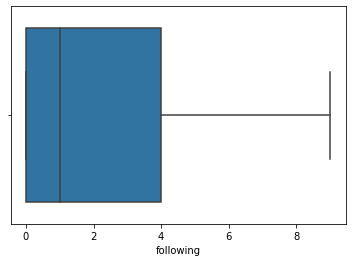

In [17]:
sns.boxplot(x=df_annotated_users_included['following'], showfliers = False)
df_annotated_users_included.sort_values('following', ascending=False).head(10)
